# Testing SREX Classes

## Load libraries

In [1]:
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from models.srex.ranking import Ranking
from utils.data_utils import DataUtils

# Initialize some variables

In [2]:
# Load Stop Words
stop_words_list = DataUtils.load_stopwords()

## Define the documents/paragraphs and configure parameters

In [3]:
query                    = 'network'
ranking_weight_type      = 'linear' # it can be: 'none', 'linear' or 'inverse'
lema                     = True
stem                     = False
summarize                = 'mean'   # it can be: 'mean' or 'median'
nr_of_graph_terms        = 5
limit_distance           = 4 
include_reference_terms  = True

text1 = 'perro hierarchical SIMkNN dual-index driven, children network we adopt hierarchical gato R-tree to store the topology of the road network and gato hierarchical topology grid model to manage the moving objects in non-uniform distribution perro'
text2 = 'perro hierarchical SIMkNN dual-index driven, house network car adopt hierarchical gato R-tree to store the topology of the road network and gato hierarchical topology grid model to manage the moving objects in non-uniform distribution perro'
text3 = 'perro hierarchical SIMkNN dual-index driven, echeverria network patricio adopt hierarchical gato R-tree to galeas the topology of the road network abel gato hierarchical topology grid model temuco manage galeas moving objects abel non-uniform patricio perro'
text4 = 'ant hierarchical SIMkNN dual-index driven, echeverria network rain adopt hierarchical rain R-tree to galeas the topology of the road network abel gato hierarchical topology grid model rain manage galeas moving objects abel non-uniform patricio ant'
title5 = 'A Scalable Method for in-Memory kNN Search over Moving Objects in Road Networks'
abstract5 = 'Nowadays, many location-based applications require the ability of querying k-nearest neighbors over a very large scale of moving objects in road networks, e.g., taxi-calling and ride-sharing services. Traditional grid index with equal-sized cells can not adapt to the skewed distribution of moving objects in real scenarios. Thus, to obtain the fast querying response time, the grid needs to be split into more smaller cells which introduces the side-effect of higher memory cost, i.e., maintaining such a large volume of cells requires a much larger memory space at the server side. In this paper, we present SIMkNN, a scalable and in-memory kNN query processing technique. SIMkNN is dual-index driven, where we adopt a R-tree to store the topology of the road network and a hierarchical grid model to manage the moving objects in non-uniform distribution. To answer a kNN query in real time, SIMkNN adopts the strategy that incrementally enlarges the search area for network distance based nearest neighbor evaluation. It is far from trivial to perform the space expansion within the hierarchical grid index. For a given cell, we first define its neighbors in different directions, then propose a cell communication technique which allows each cell in the hierarchical grid index to be aware of its neighbors at anytime. Accordingly, an efficient space expansion algorithm to generate the estimation area is proposed. The experimental evaluation shows that SIMkNN outperforms the baseline algorithm in terms of time and memory efficiency.'

list_of_articles_dicts = [{'abstract': text1}, 
                          {'abstract': text2}, 
                          {'abstract': text3}, 
                          {'abstract': text4},
                          {'title': title5, 'abstract': abstract5}]

#paragraph_text1 = 'house network cat car'
#paragraph_text2 = 'house network cat'

## Define sentence objects

In [4]:
ranking = Ranking(query, ranking_weight_type=ranking_weight_type, stop_words=stop_words_list, lemmatization=lema, stemming=stem)
ranking.calculate_article_dictionaries_list(list_of_articles_dicts)

## Calculate the Graphs

In [5]:
ranking.generate_all_graphs(nr_of_graph_terms, limit_distance, include_reference_terms, summarize)

## Plot the graphs

SUBQUERY: network
TERM: hierarchical ; PONDERATION: 1.3 ; DISTANCE: 2.0
TERM: gato ; PONDERATION: 1.3 ; DISTANCE: 2.0
TERM: topology ; PONDERATION: 1.3 ; DISTANCE: 2.5
TERM: dual ; PONDERATION: 1.0 ; DISTANCE: 4.0
TERM: index ; PONDERATION: 1.0 ; DISTANCE: 3.0
TERM: driven ; PONDERATION: 1.0 ; DISTANCE: 2.0
TERM: child ; PONDERATION: 1.0 ; DISTANCE: 1.0
TERM: adopt ; PONDERATION: 1.0 ; DISTANCE: 1.0
TERM: r ; PONDERATION: 1.0 ; DISTANCE: 4.0
TERM: tree ; PONDERATION: 1.0 ; DISTANCE: 4.0
TERM: store ; PONDERATION: 1.0 ; DISTANCE: 3.0
TERM: road ; PONDERATION: 1.0 ; DISTANCE: 1.0
TERM: grid ; PONDERATION: 1.0 ; DISTANCE: 4.0


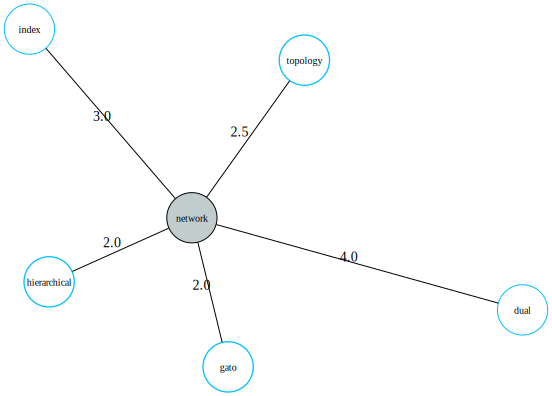

In [6]:
g1 = ranking.get_document_by_ranking_position(1).get_graph()
print(g1)
visual_graph1 = g1.get_graph_viz('0.7', 'deepskyblue')
visual_graph1

SUBQUERY: network
TERM: hierarchical ; PONDERATION: 1.2 ; DISTANCE: 2.5
TERM: gato ; PONDERATION: 1.2 ; DISTANCE: 2.5
TERM: topology ; PONDERATION: 1.2 ; DISTANCE: 2.5
TERM: dual ; PONDERATION: 0.9 ; DISTANCE: 4.0
TERM: index ; PONDERATION: 0.9 ; DISTANCE: 3.0
TERM: driven ; PONDERATION: 0.9 ; DISTANCE: 2.0
TERM: house ; PONDERATION: 0.9 ; DISTANCE: 1.0
TERM: car ; PONDERATION: 0.9 ; DISTANCE: 1.0
TERM: adopt ; PONDERATION: 0.9 ; DISTANCE: 2.0
TERM: tree ; PONDERATION: 0.9 ; DISTANCE: 4.0
TERM: store ; PONDERATION: 0.9 ; DISTANCE: 3.0
TERM: road ; PONDERATION: 0.9 ; DISTANCE: 1.0
TERM: grid ; PONDERATION: 0.9 ; DISTANCE: 4.0


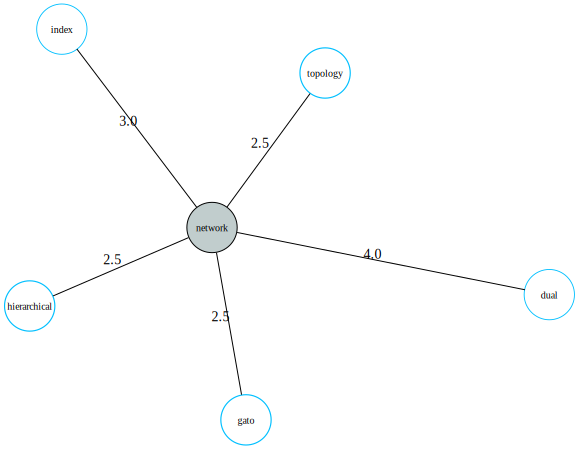

In [7]:
g2 = ranking.get_document_by_ranking_position(2).get_graph()
print(g2)
visual_graph2 = g2.get_graph_viz('0.7', 'deepskyblue')
visual_graph2

SUBQUERY: network
TERM: hierarchical ; PONDERATION: 1.0 ; DISTANCE: 3.0
TERM: gato ; PONDERATION: 1.0 ; DISTANCE: 3.0
TERM: topology ; PONDERATION: 1.0 ; DISTANCE: 3.0
TERM: dual ; PONDERATION: 0.8 ; DISTANCE: 4.0
TERM: index ; PONDERATION: 0.8 ; DISTANCE: 3.0
TERM: driven ; PONDERATION: 0.8 ; DISTANCE: 2.0
TERM: echeverria ; PONDERATION: 0.8 ; DISTANCE: 1.0
TERM: patricio ; PONDERATION: 0.8 ; DISTANCE: 1.0
TERM: adopt ; PONDERATION: 0.8 ; DISTANCE: 2.0
TERM: tree ; PONDERATION: 0.8 ; DISTANCE: 4.0
TERM: galea ; PONDERATION: 0.8 ; DISTANCE: 3.0
TERM: road ; PONDERATION: 0.8 ; DISTANCE: 1.0
TERM: abel ; PONDERATION: 0.8 ; DISTANCE: 1.0


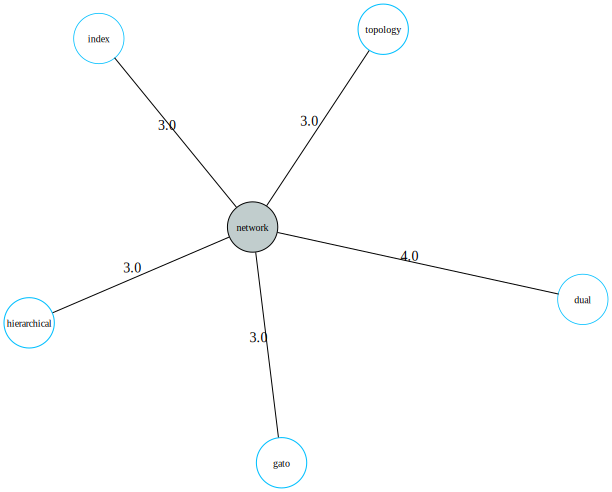

In [8]:
g3 = ranking.get_document_by_ranking_position(3).get_graph()
print(g3)
visual_graph3 = g3.get_graph_viz('0.7', 'deepskyblue')
visual_graph3

SUBQUERY: network
TERM: hierarchical ; PONDERATION: 0.9 ; DISTANCE: 3.0
TERM: rain ; PONDERATION: 0.9 ; DISTANCE: 2.5
TERM: topology ; PONDERATION: 0.9 ; DISTANCE: 3.0
TERM: dual ; PONDERATION: 0.7 ; DISTANCE: 4.0
TERM: index ; PONDERATION: 0.7 ; DISTANCE: 3.0
TERM: driven ; PONDERATION: 0.7 ; DISTANCE: 2.0
TERM: echeverria ; PONDERATION: 0.7 ; DISTANCE: 1.0
TERM: adopt ; PONDERATION: 0.7 ; DISTANCE: 2.0
TERM: tree ; PONDERATION: 0.7 ; DISTANCE: 4.0
TERM: galea ; PONDERATION: 0.7 ; DISTANCE: 3.0
TERM: road ; PONDERATION: 0.7 ; DISTANCE: 1.0
TERM: abel ; PONDERATION: 0.7 ; DISTANCE: 1.0
TERM: gato ; PONDERATION: 0.7 ; DISTANCE: 2.0


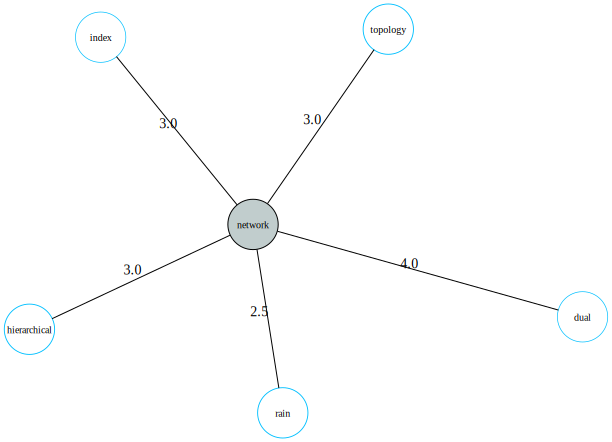

In [9]:
g4 = ranking.get_document_by_ranking_position(4).get_graph()
print(g4)
visual_graph4 = g4.get_graph_viz('0.7', 'deepskyblue')
visual_graph4

## Calculate Similarity

In [10]:
similarity0 = g1.get_euclidean_distance_as_base_graph(g1)
similarity0

0.0

In [11]:
similarity1 = g1.get_euclidean_distance_as_base_graph(g2)
similarity1

0.2041241452319315

In [12]:
similarity2 = g1.get_euclidean_distance_as_base_graph(g3)
similarity2

0.30046260628866567

In [13]:
similarity3 = g1.get_euclidean_distance_as_base_graph(g4)
similarity3

0.24999999999999992

## Merge graphs

SUBQUERY: network
TERM: road ; PONDERATION: 5.2 ; DISTANCE: 1.0
TERM: hierarchical ; PONDERATION: 5.0 ; DISTANCE: 2.4
TERM: topology ; PONDERATION: 5.0 ; DISTANCE: 2.6
TERM: gato ; PONDERATION: 4.2 ; DISTANCE: 2.4
TERM: tree ; PONDERATION: 4.0 ; DISTANCE: 4.0
TERM: dual ; PONDERATION: 3.4 ; DISTANCE: 4.0
TERM: index ; PONDERATION: 3.4 ; DISTANCE: 3.0
TERM: driven ; PONDERATION: 3.4 ; DISTANCE: 2.0
TERM: adopt ; PONDERATION: 3.4 ; DISTANCE: 1.7
TERM: store ; PONDERATION: 2.5 ; DISTANCE: 3.0
TERM: grid ; PONDERATION: 2.5 ; DISTANCE: 3.5
TERM: echeverria ; PONDERATION: 1.5 ; DISTANCE: 1.0
TERM: galea ; PONDERATION: 1.5 ; DISTANCE: 3.0
TERM: abel ; PONDERATION: 1.5 ; DISTANCE: 1.0
TERM: search ; PONDERATION: 1.2 ; DISTANCE: 3.0
TERM: moving ; PONDERATION: 1.2 ; DISTANCE: 3.0
TERM: object ; PONDERATION: 1.2 ; DISTANCE: 2.0
TERM: child ; PONDERATION: 1.0 ; DISTANCE: 1.0
TERM: r ; PONDERATION: 1.0 ; DISTANCE: 4.0
TERM: rain ; PONDERATION: 0.9 ; DISTANCE: 2.5
TERM: house ; PONDERATION: 0.9 ; D

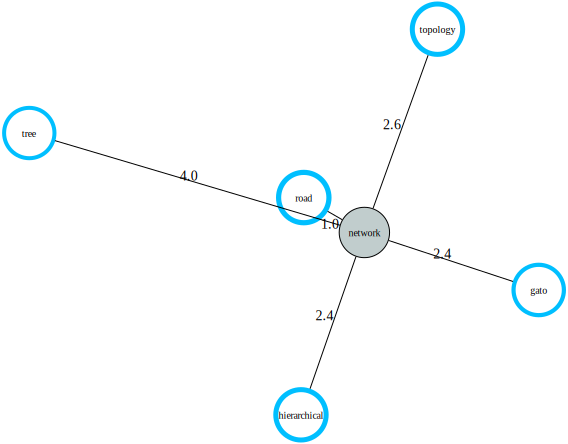

In [14]:
ranking_graph = ranking.get_graph()
print(ranking_graph)
visual_ranking_graph = ranking_graph.get_graph_viz('0.7', 'deepskyblue')
visual_ranking_graph

SUBQUERY: network
TERM: road ; PONDERATION: 1.8 ; DISTANCE: 1.0
TERM: search ; PONDERATION: 1.2 ; DISTANCE: 3.0
TERM: moving ; PONDERATION: 1.2 ; DISTANCE: 3.0
TERM: object ; PONDERATION: 1.2 ; DISTANCE: 2.0
TERM: eg ; PONDERATION: 0.6 ; DISTANCE: 1.0
TERM: ride ; PONDERATION: 0.6 ; DISTANCE: 4.0
TERM: taxi ; PONDERATION: 0.6 ; DISTANCE: 2.0
TERM: calling ; PONDERATION: 0.6 ; DISTANCE: 3.0
TERM: scale ; PONDERATION: 0.6 ; DISTANCE: 4.0
TERM: topology ; PONDERATION: 0.6 ; DISTANCE: 2.0
TERM: model ; PONDERATION: 0.6 ; DISTANCE: 3.0
TERM: manage ; PONDERATION: 0.6 ; DISTANCE: 4.0
TERM: store ; PONDERATION: 0.6 ; DISTANCE: 3.0
TERM: hierarchical ; PONDERATION: 0.6 ; DISTANCE: 1.0
TERM: tree ; PONDERATION: 0.6 ; DISTANCE: 4.0
TERM: grid ; PONDERATION: 0.6 ; DISTANCE: 2.0
TERM: based ; PONDERATION: 0.6 ; DISTANCE: 2.0
TERM: incrementally ; PONDERATION: 0.6 ; DISTANCE: 4.0
TERM: area ; PONDERATION: 0.6 ; DISTANCE: 1.0
TERM: distance ; PONDERATION: 0.6 ; DISTANCE: 1.0
TERM: neighbor ; PONDERA

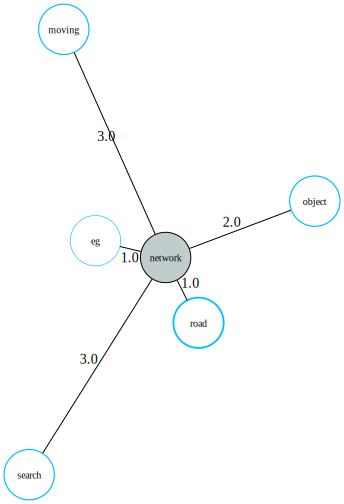

In [15]:
g5 = ranking.get_document_by_ranking_position(5).get_graph()
print(g5)
visual_graph5 = g5.get_graph_viz('0.7', 'deepskyblue')
visual_graph5